In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Problem 1

## First we generate paths of 10000 stocks over 1000 periods

In [2]:
# define num of periods and num of stocks
periods = 1000
num_stocks = 10000

# a function to generate one stock path
def gen_one_path():
    p = [1]
    for i in range(1,periods):
        p.append((1+0.007*np.random.normal(0,1))*p[i-1])
    return np.array(p)

In [3]:
# store all paths into a list
paths = []
for i in range(num_stocks):
    paths.append(gen_one_path())

## Plot 50 sample paths

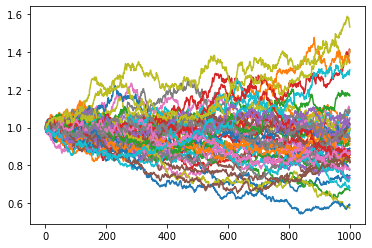

In [4]:
for i in range(50):
    plt.plot(paths[i])

From the previous figure we can find that our stocks follow random walks, it makes sense.

## Then we apply our selecting rule to generate Russell 1000 index

In [5]:
def update_index(start,end):
    """return the index from start time to end time
    
    start: the update time
    end: the next update time
    """
    index = np.repeat(0.0,end-start)
    path = []
    for i in paths:
        path.append(i[start])
    tops = np.argsort(path)[-1000:]
    for i in tops:
        index+=paths[i][start:end]
    return index/1000

In [6]:
# select stocks into Russell 1000 index
update_time = np.arange(1,1000,50)
update_time = np.append(update_time,1000)
index = np.array([])
index_mean = np.array([])
for i in range(1,len(update_time)):
    new_index = update_index(update_time[i-1],update_time[i])
    index=np.append(index, new_index)
windows = np.arange(1,1000,100)
for i in range(1,len(windows)):
    mean = index[windows[i-1]:windows[i]].mean()
    index_mean = np.append(index_mean, mean)

In [18]:
index_mean
len(np.arange(1,1000,100))

10

ValueError: x and y must be the same size

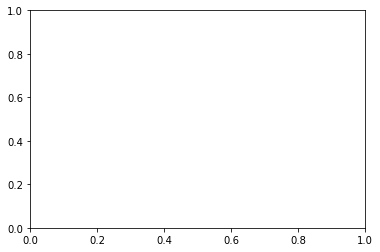

In [14]:
plt.scatter(np.arange(1,1000,100),index_mean)

It seems reasonable because we select 1000 stocks with laregest market cap every 50 periods.

## Average return of index

In [50]:
re = np.array([])
for i in range(1,len(windows)):
    returns = np.log(index[windows[i]]) - np.log(index[windows[i-1]])
    re = np.append(re,returns/100)

IndexError: index 1001 is out of bounds for axis 0 with size 999

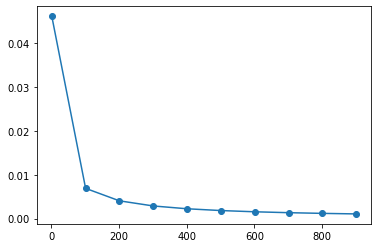

In [49]:
plt.scatter(np.arange(1,1000,100),re)
plt.plot(np.arange(1,1000,100),re)

## Average return of 10000 stocks

In [ ]:
re = np.array([])
for i in range(1,len(windows)):
    returns = np.log(windows[i]) - np.log(windows[i-1])
    re = np.append(re,returns/100)

# Problem 2

## Download data (11 ETFs and SPY)

In [144]:
import yfinance as yf
symbols = ['VOX','VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU', 'SPY']
secs = ['COMM', 'CONSUMER DISC', 'CONSUMER ST', 'ENERGY', 'FINANCIALS', 'HEALTH', 'INDUSTRIALS', 
           'TECHNOLOGY', 'MATIREALS', 'REAL ESTATE', 'UTILITIES']
start = '2010-1-1'
end = '2020-12-31'
data = yf.download(symbols,start,end)['Adj Close'] 

[*********************100%***********************]  12 of 12 completed


## Calculate log return

In [148]:
returns = np.log(data/data.shift(1))
returns = returns.dropna()

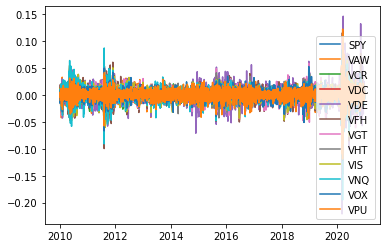

In [155]:
for col in returns.columns:
    plt.plot(returns[col], label = col)
plt.legend()
plt.show()

In [238]:
df = returns.loc[:,['VOX','VCR', 'VDC', 'VDE', 'VFH', 'VHT', 'VIS', 'VGT', 'VAW', 'VNQ', 'VPU']]
df = df*100
df

,VOX,VCR,VDC,VDE,VFH,VHT,VIS,VGT,VAW,VNQ,VPU
Date,,,,,,,,,,,
2010-01-05,0.673390,0.634343,0.090387,1.018429,1.109800,-0.620777,0.436809,-0.107575,0.599303,-0.112313,-0.936101
2010-01-06,-1.595893,0.105402,-0.015050,1.144839,0.167082,0.566155,0.246038,-0.702149,1.398633,-0.179952,0.446116
2010-01-07,-0.367865,0.859609,0.000000,-0.239348,1.918053,0.345443,1.221250,-0.380120,-0.435886,1.074837,-0.446116
2010-01-08,-0.457342,0.083453,-0.543579,0.750272,-0.393831,0.362304,1.317156,0.776786,1.079138,-0.737724,-0.107970
2010-01-11,0.088110,-0.125210,0.347617,-0.079309,-0.032900,0.505077,0.935499,-0.432801,-0.335074,0.581679,0.768761
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.677212,0.084619,0.414937,2.502546,1.632238,0.130804,0.568656,-0.914352,0.278358,-0.648859,-0.172607
2020-12-24,0.067468,0.194736,0.424812,-0.840025,0.041858,0.139639,0.064961,0.662467,0.535129,0.871695,0.599084
2020-12-28,1.240064,0.796987,0.648302,-0.731191,0.375961,-0.297528,-0.053135,0.700333,-0.405921,0.594320,0.565799


In [239]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

## Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all 

In [240]:
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value,p_value

(37302.53160256921, 0.0)

## Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 

In [241]:
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.947110469399138

## Create factor analysis object and perform factor analysis

In [242]:
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)
ev, v = fa.get_eigenvalues()

## Create scree plot

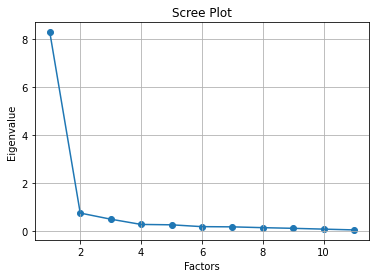

In [243]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## From the figure we may choose 4 factors, let us check the loadings:

In [244]:
fa = FactorAnalyzer(n_factors=4, rotation="varimax")
fa.fit(df)
loadings = pd.DataFrame(fa.loadings_)
loadings.index = df.columns
loadings.columns = ['factor1','factor2','factor3','factor4']
loadings

,factor1,factor2,factor3,factor4
VOX,0.412125,0.609746,0.378642,0.194088
VCR,0.490578,0.727370,0.276853,0.263939
VDC,0.324255,0.471880,0.719590,0.114409
VDE,0.734166,0.313965,0.251493,0.157426
VFH,0.674851,0.455870,0.333720,0.280676
VHT,0.413112,0.623480,0.425572,0.145798
VIS,0.702968,0.524177,0.342481,0.217564
VGT,0.414551,0.772130,0.283420,0.169177
VAW,0.730293,0.470085,0.320010,0.189977
VNQ,0.366099,0.309026,0.529836,0.696974


## Regression and prediction

Fama-MacBeth Regression:
since we have get $\beta$ from the process of factor analysis, we can just do the second stage
    $$
    \mathbf{r}_{t}=\hat{\beta}_{i} \lambda_{t}
    $$

In [315]:
from statsmodels.api import OLS, add_constant

In [316]:
lambdas = []
for period in returns.index:
    step2 = OLS(endog=df.loc[period, loadings.index], exog=loadings).fit()
    lambdas.append(step2.params)

In [317]:
lambdas = pd.DataFrame(lambdas, index=returns.index, columns=loadings.columns.tolist())
lambdas.head()

,factor1,factor2,factor3,factor4
Date,,,,
2010-01-05,1.841595,-0.236128,-1.308216,-0.010021
2010-01-06,2.527531,-2.165217,0.576585,-1.146205
2010-01-07,0.557871,-0.066805,-1.168182,2.384587
2010-01-08,1.702751,0.027919,-0.738712,-1.485795
2010-01-11,-0.063111,-0.592365,1.096744,0.306411


In [318]:
pred = np.matrix(loadings).dot(np.matrix(lambdas).transpose())
pred = np.array(pred.sum(axis=0))

In [319]:
pred = pd.Series(pred.flatten())
pred.index = lambdas.index

In [320]:
spy = data['SPY']
spy_return = spy/spy.shift(1)
spy_return = spy_return.dropna()

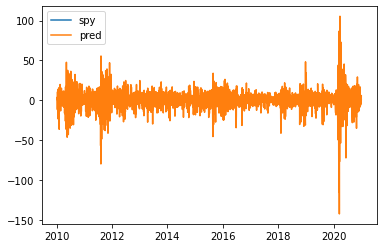

In [321]:
plt.plot(spy_return,label='spy')
plt.plot(pred,label='pred')
plt.legend()
plt.show()

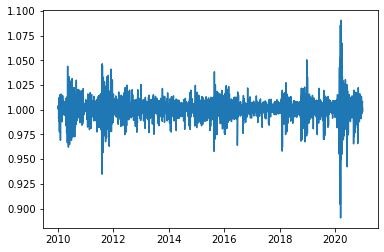

In [322]:
plt.plot(spy_return)

In [1]:
import numpy as np
np.arange(1,1000,50)

array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])